In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_column', None)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Import Dataset

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_2140\1521905525.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(466285, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Data Cleaning

In [5]:
# menghapus kolom yang tidak diperlukan
df.drop(['Unnamed: 0',
         'id',
         'member_id',
         'sub_grade',
         'emp_title', 
         'url', 
         'desc', 
         'title',
         'zip_code', 
         'next_pymnt_d', 
         'recoveries', 
         'collection_recovery_fee',
         'total_rec_prncp', 
         'total_rec_late_fee',
         'annual_inc_joint',
         'dti_joint',
         'verification_status_joint',
         'open_acc_6m',
         'open_il_6m', 
         'open_il_12m', 
         'open_il_24m', 
         'mths_since_rcnt_il',
         'total_bal_il', 
         'il_util', 
         'open_rv_12m', 
         'open_rv_24m',
         'max_bal_bc', 
         'all_util',
         'inq_fi',
         'total_cu_tl',
         'inq_last_12m'], axis=1, inplace=True)

In [6]:
df.shape

(466285, 44)

In [7]:
# mengubah tipe data kolom issue_d menjadi datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [8]:
# mengisi missing value pada kolom emp_length
df['emp_length'].fillna(value='Not available', inplace=True)

In [9]:
# menghapus baris yang memiliki missing value pada kolom loan_status
df.dropna(subset=['loan_status'], inplace=True)

In [10]:
# menghapus baris yang memiliki nilai loan_amnt=0
df = df[df['loan_amnt'] != 0]

In [11]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,861.07,Jan-15,171.62,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,435.17,Apr-13,119.66,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,603.65,Jun-14,649.91,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,2209.33,Jan-15,357.48,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,1009.07,Jan-16,67.79,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [12]:
df.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                          0
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc   

In [13]:
# menghapus kolom yang terdapat nilai null dan NaN
df.dropna(axis=1, inplace=True)

In [14]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,revol_bal,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,policy_code,application_type
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,13648,f,0.00,0.00,5861.071414,5831.78,861.07,171.62,1,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,1687,f,0.00,0.00,1008.710000,1008.71,435.17,119.66,1,INDIVIDUAL
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,2956,f,0.00,0.00,3003.653644,3003.65,603.65,649.91,1,INDIVIDUAL
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,5598,f,0.00,0.00,12226.302210,12226.30,2209.33,357.48,1,INDIVIDUAL
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,Source Verified,2011-12-01,Current,n,other,OR,17.94,27783,f,766.90,766.90,3242.170000,3242.17,1009.07,67.79,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,4 years,MORTGAGE,Source Verified,2014-01-01,Current,n,debt_consolidation,TX,19.85,23208,w,12574.00,12574.00,10383.360000,10383.36,4557.36,432.64,1,INDIVIDUAL
466281,22000,22000,22000.0,60 months,19.97,582.50,D,10+ years,MORTGAGE,Verified,2014-01-01,Charged Off,n,debt_consolidation,TN,18.45,18238,f,0.00,0.00,4677.920000,4677.92,2840.88,17.50,1,INDIVIDUAL
466282,20700,20700,20700.0,60 months,16.99,514.34,D,7 years,MORTGAGE,Verified,2014-01-01,Current,n,debt_consolidation,OH,25.65,6688,f,14428.31,14428.31,12343.980000,12343.98,6072.29,514.34,1,INDIVIDUAL
466283,2000,2000,2000.0,36 months,7.90,62.59,A,3 years,OWN,Verified,2014-01-01,Fully Paid,n,credit_card,CA,5.39,11404,w,0.00,0.00,2126.579838,2126.58,126.58,1500.68,1,INDIVIDUAL


In [15]:
df.shape

(466285, 26)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   loan_amnt            466285 non-null  int64         
 1   funded_amnt          466285 non-null  int64         
 2   funded_amnt_inv      466285 non-null  float64       
 3   term                 466285 non-null  object        
 4   int_rate             466285 non-null  float64       
 5   installment          466285 non-null  float64       
 6   grade                466285 non-null  object        
 7   emp_length           466285 non-null  object        
 8   home_ownership       466285 non-null  object        
 9   verification_status  466285 non-null  object        
 10  issue_d              466285 non-null  datetime64[ns]
 11  loan_status          466285 non-null  object        
 12  pymnt_plan           466285 non-null  object        
 13  purpose       

## Data Visualization

### Persebaran Status Peminjam

In [17]:
status_count = df['loan_status'].value_counts()
status_count

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

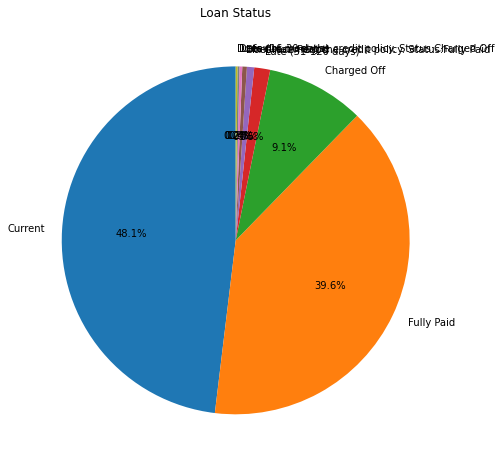

In [18]:
# membuat visualisasi menggunakan pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_count.values, labels=status_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status')
plt.show()

Berdasarkan visualisasi diatas diketahui status peminjam current sebesar 48.1%, Fully Paid sebesar 39.6%, dan Charged Off sebesar 9.1%

1. Current: Peminjam masih membayar pinjaman dan status pinjaman saat ini masih berjalan.
2. Fully Paid: Peminjam telah membayar semua pinjaman yang diberikan.
3. Charged Off: Peminjam tidak membayar pinjaman dan dianggap sebagai kerugian oleh kreditur.
4. Late (31-120 days): Peminjam terlambat membayar pinjaman selama 31-120 hari.
5. In Grace Period: Peminjam terlambat membayar pinjaman namun masih dalam periode toleransi pembayaran yang diberikan oleh kreditur.
6. Does not meet the credit policy. Status:Fully Paid: Peminjam telah membayar semua pinjaman tetapi tidak memenuhi kebijakan kredit yang ditetapkan oleh kreditur saat pengajuan pinjaman.
7. Late (16-30 days): Peminjam terlambat membayar pinjaman selama 16-30 hari.
8. Default: Peminjam tidak membayar pinjaman selama lebih dari 121 hari dan dianggap sebagai kegagalan dalam membayar pinjaman.
9. Does not meet the credit policy. Status:Charged Off: Peminjam tidak membayar pinjaman dan dianggap sebagai kerugian oleh kreditur, serta tidak memenuhi kebijakan kredit yang ditetapkan oleh kreditur saat pengajuan pinjaman.

### Persebaran Jumlah Pinjaman

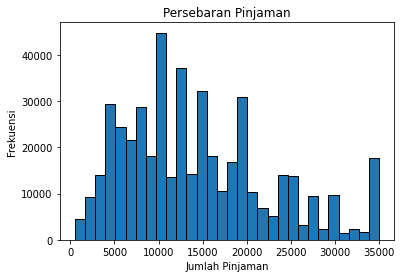

In [19]:
plt.hist(df['loan_amnt'], bins=30, edgecolor='black')

plt.title('Persebaran Pinjaman')
plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Frekuensi')

plt.show()

Berdasarkan persebaran data diatas diketahui pinjaman paling sering dipinjam yaitu $10000

### Persebaran tujuan pinjaman

In [20]:
purpose_loan = df['purpose'].value_counts()
purpose_loan

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

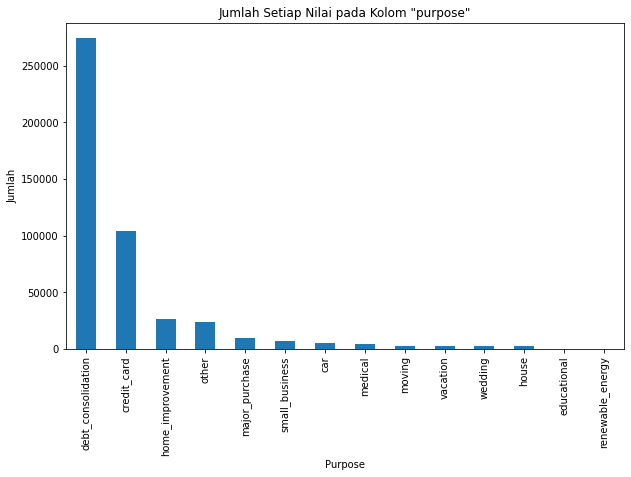

In [21]:
plt.figure(figsize=(10,6))
purpose_loan.plot(kind='bar')
plt.title('Jumlah Setiap Nilai pada Kolom "purpose"')
plt.xlabel('Purpose')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan visualisasi diatas diketahui tujuan pinjaman paling banyak digunakan untuk konsolidasi hutang

### Correlation Matrix

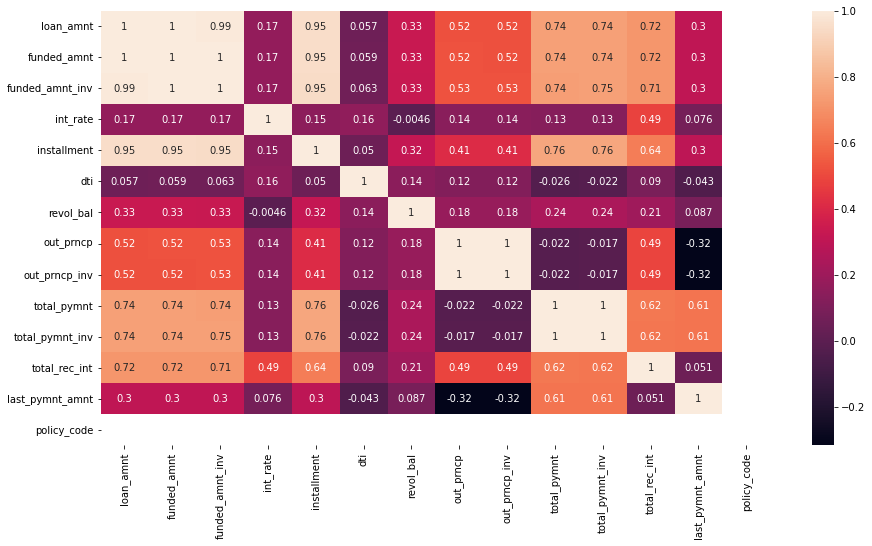

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Data Preprocessing

In [23]:
# menghapus kolom yang tidak diperlukan
df.drop(['term',
         'issue_d',
         'grade',
         'emp_length',
         'home_ownership',
         'verification_status',
         'pymnt_plan',
         'purpose',
         'addr_state',
         'initial_list_status',
         'application_type'], axis=1, inplace=True)

In [25]:
le = preprocessing.LabelEncoder()

In [26]:
df[['funded_amnt_inv', 'int_rate', 'installment', 'dti', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'last_pymnt_amnt']] = df[['funded_amnt_inv', 'int_rate', 'installment', 'dti', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'last_pymnt_amnt']].apply(le.fit_transform)

## Modelling

### Logistic Regression

In [27]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,loan_status,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,policy_code
0,5000,5000,2144,92,7918,Fully Paid,2764,13648,0,0,84311,84273,52083,12096,1
1,2500,2500,1055,257,1431,Charged Off,99,1687,0,0,3570,4339,22468,8194,1
2,2400,2400,1013,279,2826,Fully Paid,871,2956,0,0,28348,29399,33969,47991,1
3,10000,10000,4735,181,20946,Fully Paid,1999,5598,0,0,205883,204152,135673,27294,1
4,3000,3000,1245,154,1874,Current,1793,27783,6673,6723,32322,33396,62456,4497,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,7467,222,27836,Current,1984,23208,103770,107302,172861,172093,212890,33201,1
466281,22000,22000,8276,405,37960,Charged Off,1844,18238,0,0,59202,60080,164468,1231,1
466282,20700,20700,8085,313,33553,Current,2564,6688,111777,115726,207694,205947,235731,39210,1
466283,2000,2000,882,32,1576,Fully Paid,538,11404,0,0,15500,16564,4287,69411,1


In [29]:
# Memisahkan variabel independent dan dependent
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [30]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Membuat model regresi logistik dan melakukan training pada data latih
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Melakukan prediksi pada data uji
y_pred = logreg.predict(X_test)

In [34]:
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)

In [38]:
# Hitung presisi
precision = precision_score(y_test, y_pred,
                           pos_label='positive',
                           average='micro')

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [39]:
# Hitung recall
recall = recall_score(y_test, y_pred,
                     pos_label='positive',
                     average='micro')

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [42]:
# Hitung F1-score
f1 = f1_score(y_test, y_pred,
             pos_label='positive',
             average='micro')

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [43]:
# Tampilkan hasil
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.952121556558757
Precision: 0.952121556558757
Recall: 0.952121556558757
F1-score: 0.9521215565587571


### Random Foret Clasifier

In [45]:
# Membuat objek Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [46]:
# Memisahkan variabel independen (X) dan variabel dependen/target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [47]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Melatih model dengan data latih
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Memprediksi hasil dari data uji
y_pred = rfc.predict(X_test)

In [52]:
# Evaluate the model using confusion matrix, accuracy, precision, recall, and F1-score
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 8275     0     0    11     1   182     0     0     0]
 [    0 44839     2     0     0     4    15     2    32]
 [    0   137     7     0     0     0     0     0    29]
 [  109     0     0    29     2     8     0     0     0]
 [    0     0     0     0    62   315     0     0     0]
 [    5     0     0     0    22 36879     0     0     0]
 [    0   643     0     0     0     0     1     0     9]
 [    0   232     0     0     0     0     0     0     5]
 [    0  1220     1     0     0     1     0     0   178]]


Accuracy: 0.967970232797538


Classification Report:
                                                     precision    recall  f1-score   support

                                        Charged Off       0.99      0.98      0.98      8469
                                            Current       0.95      1.00      0.98     44894
                                            Default       0.70      0.04      0.08       173
Does not meet the credit policy. Status: